
# Project: NYC 311 Service Request Analysis

You don't need to limit yourself to the number of rows/cells provided. You can add additional rows in each section to add more lines of code.

**Happy coding!**

In [1]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#set pandas dataframe display parameters
pd.set_option('display.width',5000)
pd.set_option('display.max_columns',60)
#set plot size for better viewing within the notebook
plt.rcParams['figure.figsize']=(15,7)

## Basic Data Analysis of 311 NYC Service Request Dataset

In [7]:
#import the 311 NYC service request dataset
complaints = pd.read_csv('/Users/sudhanmaharjan/Desktop/DATA SCIENCE/DS_using_Python/Project - NYC 311 Service Request Analysis/311_Service_Requests_for_2009.csv')

/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (8,13,14,17,18,20,37,38,39,40,41,42,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
#view top 5 records
complaints.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,12822544,01/01/2009 12:00:00 AM,01/07/2009 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11225,55 WINTHROP STREET,WINTHROP STREET,FLATBUSH AVENUE,BEDFORD AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,NaN,01/07/2009 12:00:00 AM,0 Unspecified,Unspecified,995885.0,178504.0,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.656621,-73.958066,"(40.65662129596871, -73.95806621423951)"
1,12818524,01/01/2009 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Smoking,Smoking Violation,Restaurant/Bar/Deli/Bakery,11102,29-35 NEWTOWN AVENUE,NEWTOWN AVENUE,29 STREET,30 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,NaN,Pending,02/07/2009 12:00:00 AM,01/02/2009 12:00:00 AM,01 QUEENS,QUEENS,1005906.0,219416.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.768896,-73.921818,"(40.76889608950418, -73.92181786912313)"
2,12823061,01/01/2009 12:00:00 AM,01/01/2009 12:00:00 AM,DOT,Department of Transportation,Traffic Signal Condition,Controller,NaN,11220,NaN,NaN,NaN,NaN,6 AVENUE,GOWANUS EXPRESSWAY,INTERSECTION,BROOKLYN,NaN,NaN,Closed,NaN,01/01/2009 12:00:00 AM,10 BROOKLYN,BROOKLYN,979581.0,170750.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.635345,-74.016822,"(40.635344653337626, -74.01682221017914)"
3,12823062,01/01/2009 12:00:00 AM,01/01/2009 12:00:00 AM,DOT,Department of Transportation,Traffic Signal Condition,Controller,NaN,11201,NaN,NaN,NaN,NaN,GOLD STREET,NASSAU STREET,INTERSECTION,BROOKLYN,NaN,NaN,Closed,NaN,01/01/2009 12:00:00 AM,02 BROOKLYN,BROOKLYN,988950.0,193715.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.698378,-73.983050,"(40.698378448801606, -73.98305008771115)"
4,12823063,01/01/2009 12:00:00 AM,01/01/2009 12:00:00 AM,DOT,Department of Transportation,Traffic Signal Condition,Controller,NaN,11235,NaN,NaN,NaN,NaN,AVENUE X,OCEAN AVENUE,INTERSECTION,BROOKLYN,NaN,NaN,Closed,NaN,01/01/2009 12:00:00 AM,15 BROOKLYN,BROOKLYN,998094.0,155236.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.592752,-73.950152,"(40.59275234651692, -73.95015246435702)"


In [10]:
#view first 5 complaints type usig slicing technique
complaints['Complaint Type'][:5]

0                     HEATING
1                     Smoking
2    Traffic Signal Condition
3    Traffic Signal Condition
4    Traffic Signal Condition
Name: Complaint Type, dtype: object

In [12]:
#view compliant type and city together
complaints[['Complaint Type','City']]

,Complaint Type,City
0,HEATING,BROOKLYN
1,Smoking,ASTORIA
2,Traffic Signal Condition,BROOKLYN
3,Traffic Signal Condition,BROOKLYN
4,Traffic Signal Condition,BROOKLYN
5,HEATING,OZONE PARK
6,NONCONST,BROOKLYN
7,HEATING,BROOKLYN
8,HEATING,WOODSIDE
9,HEATING,NEW YORK


In [14]:
#view compliant type and city together
complaints[['Complaint Type','City']][0:10]

,Complaint Type,City
0,HEATING,BROOKLYN
1,Smoking,ASTORIA
2,Traffic Signal Condition,BROOKLYN
3,Traffic Signal Condition,BROOKLYN
4,Traffic Signal Condition,BROOKLYN
5,HEATING,OZONE PARK
6,NONCONST,BROOKLYN
7,HEATING,BROOKLYN
8,HEATING,WOODSIDE
9,HEATING,NEW YORK


# Most Common Complaint Type

In [18]:
#view the data most complaint Type
complaints['Complaint Type'].value_counts()

HEATING                                 238995
Street Light Condition                  130242
GENERAL CONSTRUCTION                    121048
PLUMBING                                104931
Street Condition                        102150
PAINT - PLASTER                          84324
NONCONST                                 67325
Water System                             62991
General Construction/Plumbing            61288
Traffic Signal Condition                 60995
Blocked Driveway                         52163
Sewer                                    49849
Dirty Conditions                         40732
ELECTRIC                                 38349
Building/Use                             35495
Noise                                    33707
Sanitation Condition                     32851
Noise - Street/Sidewalk                  27923
Noise - Commercial                       25234
Rodent                                   21622
Taxi Complaint                           20909
Noise - Vehic

## Visualize the Complaint Type

In [19]:
#create Complaint Type count object to visualize type data
complaint_count = complaints['Complaint Type'].value_counts()

In [20]:
#view top 10 compalint type
complaint_count[:10]

HEATING                          238995
Street Light Condition           130242
GENERAL CONSTRUCTION             121048
PLUMBING                         104931
Street Condition                 102150
PAINT - PLASTER                   84324
NONCONST                          67325
Water System                      62991
General Construction/Plumbing     61288
Traffic Signal Condition          60995
Name: Complaint Type, dtype: int64

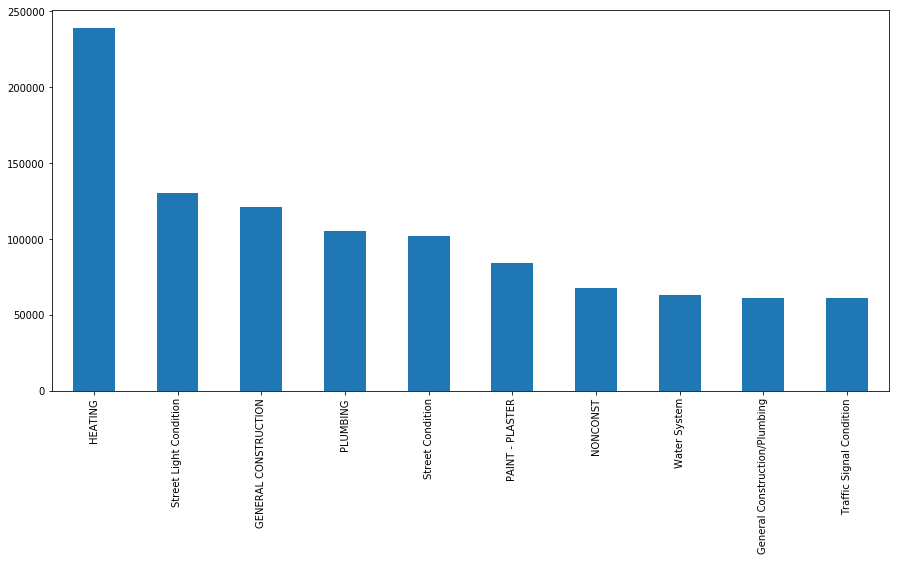

In [22]:
#plot top 10 complaint type
complaint_count[0:10].plot(kind='bar')